In [ ]:
import os
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)



Mounted at /content/gdrive/


List of useful commands

In [ ]:
from PIL import Image
import cv2 
import numpy as np
import matplotlib.pyplot as plt

for i in os.listdir("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/img"):
  if i[:-4] == "00d0654270874":
    im2 = Image.open('/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/img/'+i)

Image shape:  (2068, 928, 3)
Value type: <class 'numpy.uint8'>, Min: 0, Max: 255


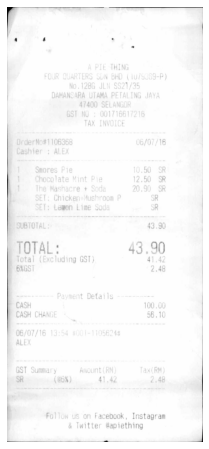

In [ ]:
im = np.array(im2) # Convert to a numpy array
print("Image shape: ", im.shape) #Prints out shape: (height, width, channels)
print("Value type: %s, Min: %d, Max: %d" % (type(im[0,0,0]), np.min(im), np.max(im))) # Image is loaded with uint8 values in [0, 255]

plt.figure(figsize=(12,8))
plt.imshow(im); # Show image
plt.axis(False); # Remove axes

In [ ]:
print(len(os.listdir("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/ocr")))

564


In [ ]:
import pandas as pd
import csv
lengths = []
ids = []
texts = []
top_y = []
bottom_y = []
for i in os.listdir("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/ocr"):
  if i != ".DS_Store":
    if i[-4:] == ".csv":
    curr_csv = pd.read_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/ocr/" + i, names = ["x1","y1","x2","y2","x3","y3",                        
                                                                                              "x4","y4","text1","text2","text3","text4","text5"],quoting=csv.QUOTE_NONE)
    curr_csv['Text'] = curr_csv[curr_csv.columns[-3:]].apply( lambda x: ''.join(x.dropna().astype(str)), axis=1)

    bottom_y.append(list(curr_csv["y4"])[-1])
    top_y.append(list(curr_csv["y4"])[0])

    lengths.append(len(curr_csv))
    full_text = " ".join(list(curr_csv["Text"]))
    ids.append(str(i[:-4]))
    texts.append(full_text)


OSError: ignored

In [ ]:
print(len(ids))

(array([ 60., 172., 208.,  48.,  13.,  10.,  28.,  12.,   7.,   4.]),
 array([  50. ,  691.2, 1332.4, 1973.6, 2614.8, 3256. , 3897.2, 4538.4,
        5179.6, 5820.8, 6462. ]),
 <a list of 10 Patch objects>)

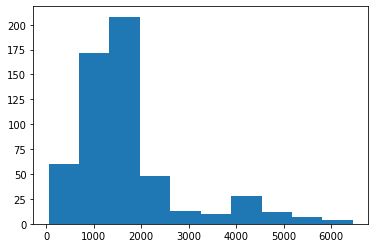

In [ ]:
plt.hist(bottom_y)

(array([243., 235.,  20.,   3.,   9.,   6.,  12.,  13.,  16.,   5.]),
 array([  26. ,  231.5,  437. ,  642.5,  848. , 1053.5, 1259. , 1464.5,
        1670. , 1875.5, 2081. ]),
 <a list of 10 Patch objects>)

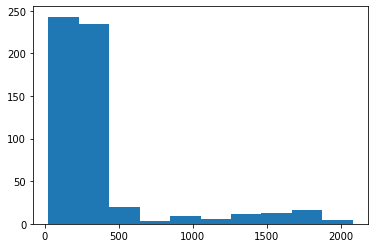

In [ ]:
plt.hist(top_y)

(array([  2.,   2.,   6.,  11.,   8.,  33.,  68., 253., 156.,  23.]),
 array([-6005. , -5376.1, -4747.2, -4118.3, -3489.4, -2860.5, -2231.6,
        -1602.7,  -973.8,  -344.9,   284. ]),
 <a list of 10 Patch objects>)

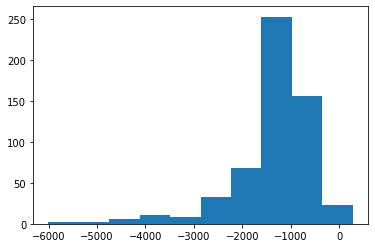

In [ ]:
plt.hist(np.array(top_y) - np.array(bottom_y))

In [ ]:
ocr_text = pd.DataFrame({"documentid": ids, "Texts" : texts})

In [ ]:
ocr_text.to_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/ocr_id_to_text.csv")

In [ ]:
users = pd.read_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/Users.csv")

In [ ]:
!pip install pytesseract --quiet
!apt install tesseract-ocr --quiet

import pytesseract

In [ ]:
texts_col = []
counter = 0
for id in users["documentid"]:
  
  if id not in list(ocr_text["documentid"]):
    pytesseract.pytesseract.run_tesseract("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/img/" + id + ".jpg", "output","text",lang="eng")
    
    with open('output.txt') as fh:
        result = fh.read()
    result = result.replace("\n"," ").strip()
    texts_col.append(result)    
  else:
    texts_col.append(ocr_text[ocr_text["documentid"] == id]["Texts"].item())

In [ ]:
users["Texts"] = texts_col

In [ ]:
users.set_index(users["documentid"])

,documentid,paymentid,amount,date,vendor_name,vendor_address,Texts
documentid,,,,,,,
00d0624439175,00d0624439175,00p0535380313,72.90,2916-4-17,MR. D.I.Y. (KUCHZAI) SDNBHD,"LOT 1851-A & 1851-B, JALAN KPB 6, KAWASAN PERI...",MR. D.I.Y. (KUCHAI) SDN BHD LOT 1851-A & 1851-...
00d0654270874,00d0654270874,00p0432205035,43.90,2016-6-7,FOUR QUARTERS SDN BHD,NO.28G JLN SS21/35 DAMANSARA UTAMA PETALING JA...,A PIE THING FOUR QUARTERS SDN BHD (1079369-P) ...
00d0403711886,00d0403711886,00p0174820163,32.23,2018-10-1,SYARIKAT PERNIAGAAN GIJ KEE,"NO 290, JALAN AIR PANAS, SETAPAK, 53020, KUALA...",SYARIKAT PERNIAGAAN GIN KEE (81109-A) NO 290 J...
00d0956164753,00d0956164753,00p0943784617,503.10,2018-3-23,TIMELESS KITCHENETE SDN BHD,"LLT 50, FLOOR T2,SKY AVENUE GENTING HIGHLANDS ...",Morganfields* % Home of Suicky Bones * Timel...
00d0667839698,00d0667839698,00p0762437501,1110.00,2016-2-28,SIN THEY & COMPANY,"NO.54, BATU 5,JALAN IPOH, KG.BATU, 5110 KUALA ...",SIMPLIFIED TAX INVOICE SIN THYE & COMPANY REG...
...,...,...,...,...,...,...,...
00d0223498663,00d0223498663,00p0611347643,29.30,2016-12-25,GOLDEN ARCHES RESTAURANTS SDN BHD,"LEVEL 6, BANGUNAN TH, DAMANSARA UPTOWN3 NO.3, ...",YOUR ORDER NUMBER IS 264 GOLDEN ARCHES RESTAUR...
00d0206227401,00d0206227401,00p0603265655,8.70,2017-8-7,SANYU STATIONERY SHOP,"NO. 31G&3G, JALAN SETIA INDAH X ,U13/X 40170 S...",SANYU STATIONERY SHOP NO. 31G&33G JALAN SETIA ...
00d0898930568,00d0898930568,00p0751192439,2.50,2018-1-24,99 SPEED MART S/B,"LOT P.T. 281 1, JALAN ANGSA, TAMAN BERKELEY 41...",99 SPEED MART S/B (519537-X) LOT P.T. 2811 JAL...


In [ ]:
users.to_csv("/content/gdrive/Shareddrives/Rice Datathon 2023 - Team VAMB/Bill.com/users_w_ocr.csv")

In [ ]:
users

,documentid,paymentid,amount,date,vendor_name,vendor_address,Texts
0,00d0624439175,00p0535380313,72.90,2916-4-17,MR. D.I.Y. (KUCHZAI) SDNBHD,"LOT 1851-A & 1851-B, JALAN KPB 6, KAWASAN PERI...",MR. D.I.Y. (KUCHAI) SDN BHD LOT 1851-A & 1851-...
1,00d0654270874,00p0432205035,43.90,2016-6-7,FOUR QUARTERS SDN BHD,NO.28G JLN SS21/35 DAMANSARA UTAMA PETALING JA...,A PIE THING FOUR QUARTERS SDN BHD (1079369-P) ...
2,00d0403711886,00p0174820163,32.23,2018-10-1,SYARIKAT PERNIAGAAN GIJ KEE,"NO 290, JALAN AIR PANAS, SETAPAK, 53020, KUALA...",SYARIKAT PERNIAGAAN GIN KEE (81109-A) NO 290 J...
3,00d0956164753,00p0943784617,503.10,2018-3-23,TIMELESS KITCHENETE SDN BHD,"LLT 50, FLOOR T2,SKY AVENUE GENTING HIGHLANDS ...",Morganfields* % Home of Suicky Bones * Timel...
4,00d0667839698,00p0762437501,1110.00,2016-2-28,SIN THEY & COMPANY,"NO.54, BATU 5,JALAN IPOH, KG.BATU, 5110 KUALA ...",SIMPLIFIED TAX INVOICE SIN THYE & COMPANY REG...
...,...,...,...,...,...,...,...
494,00d0223498663,00p0611347643,29.30,2016-12-25,GOLDEN ARCHES RESTAURANTS SDN BHD,"LEVEL 6, BANGUNAN TH, DAMANSARA UPTOWN3 NO.3, ...",YOUR ORDER NUMBER IS 264 GOLDEN ARCHES RESTAUR...
495,00d0206227401,00p0603265655,8.70,2017-8-7,SANYU STATIONERY SHOP,"NO. 31G&3G, JALAN SETIA INDAH X ,U13/X 40170 S...",SANYU STATIONERY SHOP NO. 31G&33G JALAN SETIA ...
496,00d0898930568,00p0751192439,2.50,2018-1-24,99 SPEED MART S/B,"LOT P.T. 281 1, JALAN ANGSA, TAMAN BERKELEY 41...",99 SPEED MART S/B (519537-X) LOT P.T. 2811 JAL...
497,00d0397644256,00p0962484273,63.80,2018-2-22,BILLION SIX ENTERPRISE,"NO 3, JALAN TAMAN JAS'A 2; . SECTION U6, 40150...",BILLION SIX ENTERPRISE NO 3 JALAN TAMAN JAS'A ...


In [ ]:
!apt search tesseract

(array([ 38., 157., 187.,  88.,  59.,  21.,   6.,   4.,   0.,   2.]),
 array([ 18. ,  31.5,  45. ,  58.5,  72. ,  85.5,  99. , 112.5, 126. ,
        139.5, 153. ]),
 <a list of 10 Patch objects>)

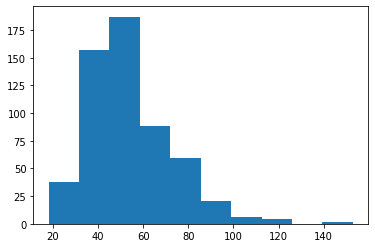

In [ ]:
import matplotlib.pyplot as plt

plt.hist(lengths)